In [2]:
'''

This code is used to investigate the effects of TPVs on Z500 and Z500 ensemble spread


'''
%matplotlib inline

import cartopy.crs as ccrs
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from datetime import datetime
from netCDF4 import Dataset

#import read_ecmwf_utils as reu
#import read_TPV_utils as rtu
import spatial_utils as su
import plot_utils as pu
import spherical_plot_utils as spu
import save_utils as sau

In [3]:
import importlib
#importlib.reload(sau)
#importlib.reload(spu)
#importlib.reload(su)

### Define class for keeping info about each analysis

In [4]:
class spatial_info:   
    # Forecast offset options in days
    # Select using t_ind. e.g. day_ind(0)=1, day_ind(6)=14;
    day_ind = ('1', '2', '3', '5', '7', '10', '14')
    
    def __init__(self, nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d):
        # File name from which variable will be loaded
        self.nc_file = nc_file
        # Variable name to be loaded
        self.var_name = var_name
        # Time offset (set as False if not doing a forecast)
        self.t_ind = t_ind
        # Scale anomalies by climatology standard deviation if True, else False
        self.scale = scale
        # Select which months to include
        self.months = months
        # Amplitude fraction. The upper amp_perc percentage of amplitudes is used.
        self.amp_perc = amp_perc
        # Maximum latitude. Above this variable ignored.
        self.max_lat = max_lat
        # Maximum distance (km). Beyond this radius variable ignored/
        self.max_d = max_d
        # Resolution (degrees) of grid on which final compositing is done.
        self.step_size_a = step_size_a
        # Resolution (km) of grid on which final compositing is done.
        self.step_size_d = step_size_d
        # Getting date name
        self.var_date_name = var_name + '_dates'

### Effect of TPVs on Z500

17  out of 18


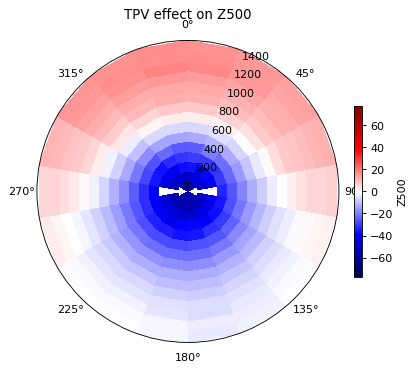

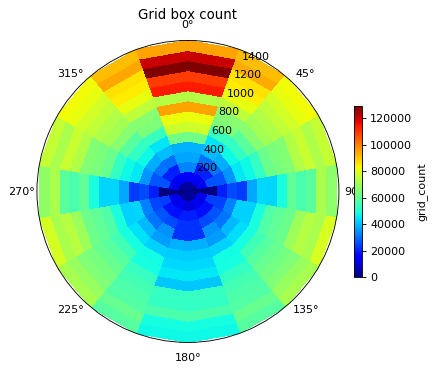

In [5]:
#standard
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500.nc'
var_name = 'Z500'
t_ind = False
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

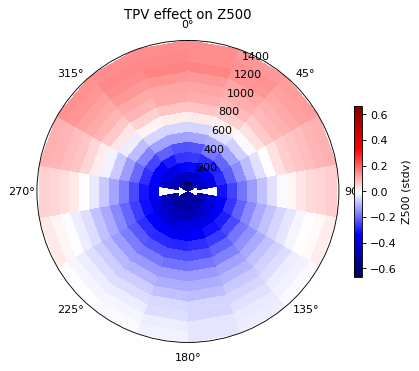

In [7]:
#scaled by stdv
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500.nc'
var_name = 'Z500'
t_ind = False
scale = True
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

17  out of 18


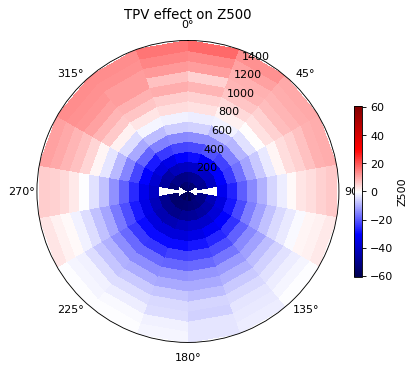

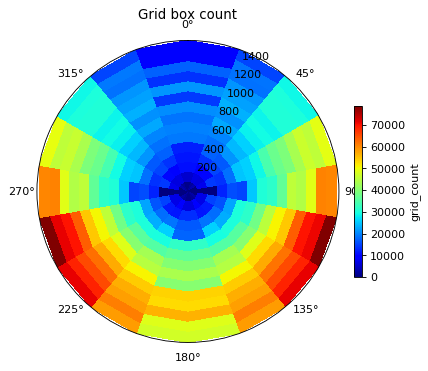

In [8]:
#limit max lat
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500.nc'
var_name = 'Z500'
t_ind = False
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 80
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

17  out of 18


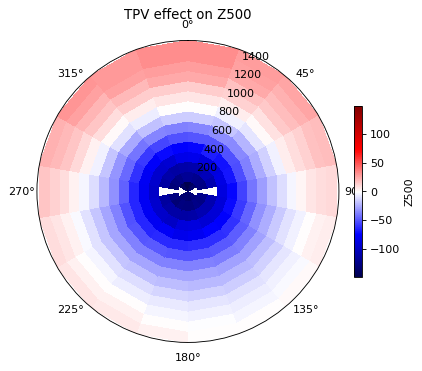

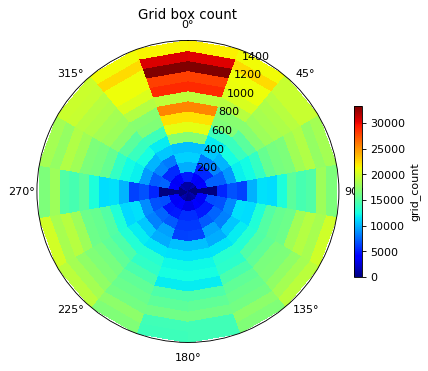

In [9]:
#limit max amplitude
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500.nc'
var_name = 'Z500'
t_ind = False
scale = False
months = (6,7,8)
amp_perc = 25
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

17  out of 18


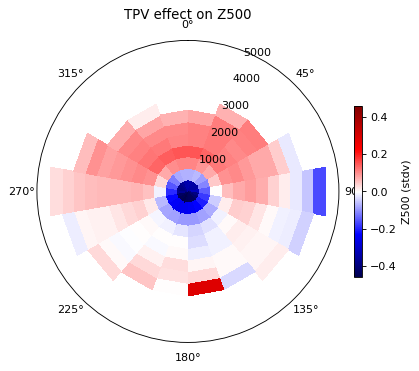

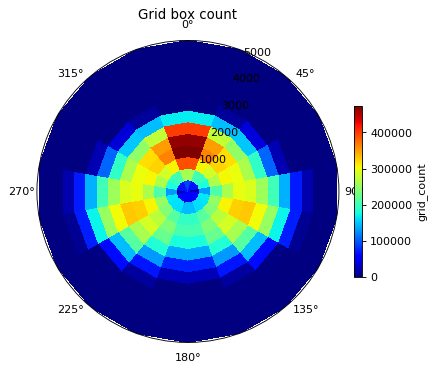

In [10]:
#high max_d
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500.nc'
var_name = 'Z500'
t_ind = False
scale = True
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 5200
step_size_d = 400
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

## TPV effect on Z500 RMSE

17  out of 18


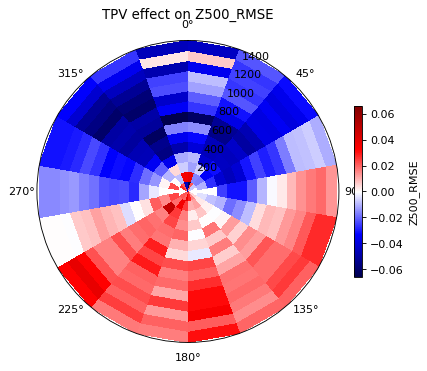

In [12]:
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500_RMSE.nc'
var_name = 'Z500_RMSE'
t_ind = 0
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

#
#
# OK, BUT SHOULDN'T THESE RMSE VALUES BE=0? hmmm?
#
#

17  out of 18


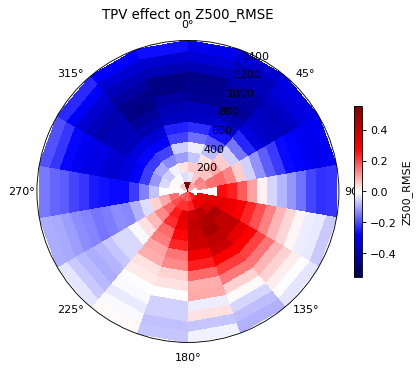

In [13]:
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500_RMSE.nc'
var_name = 'Z500_RMSE'
t_ind = 1
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

17  out of 18


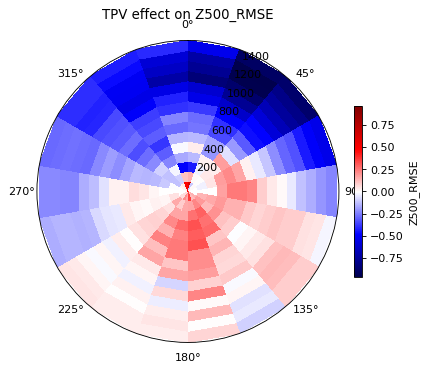

In [14]:
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500_RMSE.nc'
var_name = 'Z500_RMSE'
t_ind = 2
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

17  out of 18


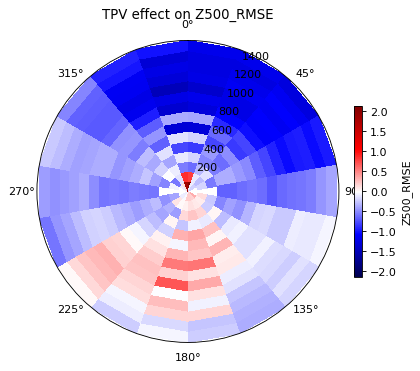

In [15]:
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500_RMSE.nc'
var_name = 'Z500_RMSE'
t_ind = 3
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

17  out of 18


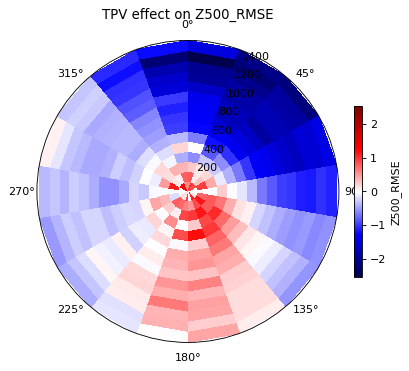

In [16]:
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500_RMSE.nc'
var_name = 'Z500_RMSE'
t_ind = 4
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

17  out of 18


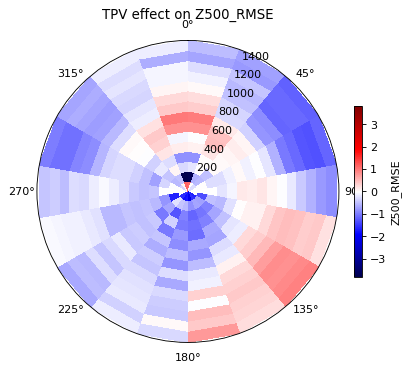

In [17]:
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500_RMSE.nc'
var_name = 'Z500_RMSE'
t_ind = 5
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

17  out of 18


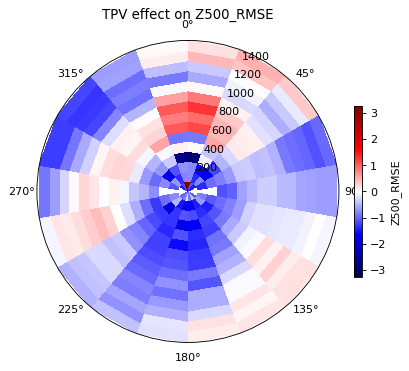

In [18]:
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500_RMSE.nc'
var_name = 'Z500_RMSE'
t_ind = 6
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

### TPV effect on PSL stdv

17  out of 18


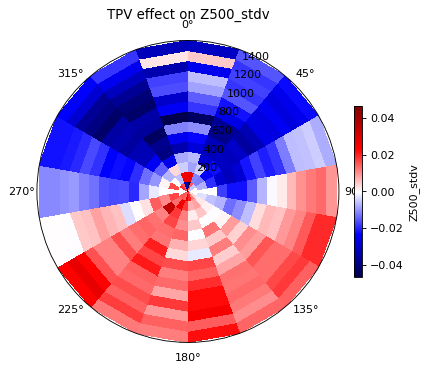

In [19]:
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500_stdv.nc'
var_name = 'Z500_stdv'
t_ind = 0
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)

#
#
# OK, BUT SHOULDN'T THESE RMSE VALUES BE=0? hmmm?
#
#

17  out of 18


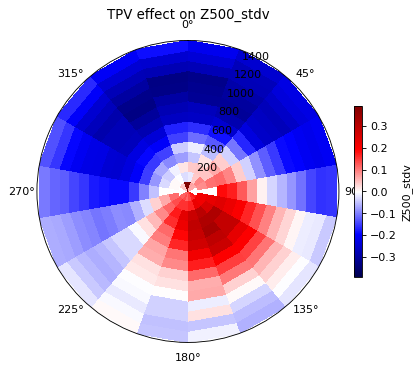

In [20]:
nc_file = '/home/disk/sipn/rclancy/ecmwf/pf/predictability/Z500/Z500_stdv.nc'
var_name = 'Z500_stdv'
t_ind = 1
scale = False
months = (6,7,8)
amp_perc = 100
max_lat = 90
max_d = 1500
step_size_d = 100
step_size_a = 20
info_1 = spatial_info(nc_file, var_name, t_ind, scale, months, amp_perc, max_lat, max_d, step_size_a, step_size_d)

Z500_grid, grid_count, a_im, d_im = su.var_TPV_full_spatial(info_1)
sau.save_spherical_np(info_1, Z500_grid, grid_count)

spu.pcolor_tpv_spherical(Z500_grid, step_size_d, max_d, step_size_a, var_name, scale)
#spu.pcolor_gridcount_spherical(grid_count, step_size_d, max_d, step_size_a)